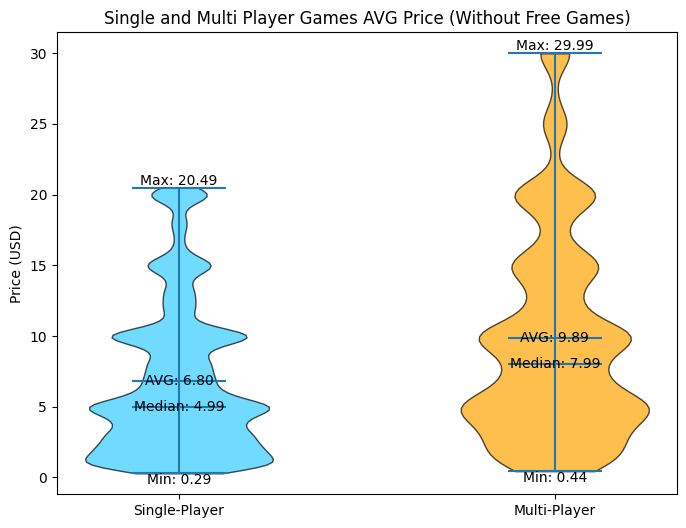

In [21]:
import json

import matplotlib.pyplot as plt
import numpy as np

# 載入單人遊戲和多人遊戲的 JSON 檔案
with open('single_player_games.json', 'r', encoding='utf-8') as f:
    single_player_games = json.load(f)

with open('multi_player_games.json', 'r', encoding='utf-8') as f:
    multi_player_games = json.load(f)

# 提取單人遊戲和多人遊戲的價格，排除免費遊戲，並過濾掉與其他價格相差超過 400 的價格
def filter_prices(games):
    prices = [game['price'] for game in games if game['price'] > 0]
    if not prices:
        return []
    q1 = np.percentile(prices, 25)
    q3 = np.percentile(prices, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [price for price in prices if lower_bound <= price <= upper_bound]

single_player_prices = filter_prices(single_player_games)
multi_player_prices = filter_prices(multi_player_games)

# 計算統計數據
def calculate_stats(prices):
    return {
        'max': np.max(prices),
        'min': np.min(prices),
        'median': np.median(prices),
        'AVG': np.mean(prices)
    }

single_player_stats = calculate_stats(single_player_prices)
multi_player_stats = calculate_stats(multi_player_prices)

# 繪製小提琴圖
plt.figure(figsize=(8, 6))

# 繪製小提琴圖
parts = plt.violinplot(
    [single_player_prices, multi_player_prices], showmeans=True, showmedians=True
)

# 設定顏色
colors = ['#33CCFF', 'orange']
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# 顯示統計數據
for i, stats in enumerate([single_player_stats, multi_player_stats]):
    plt.text(i + 1, stats['max'], f"Max: {stats['max']:.2f}", ha='center', va='bottom')
    plt.text(i + 1, stats['min'], f"Min: {stats['min']:.2f}", ha='center', va='top')
    plt.text(
        i + 1, stats['median'], f"Median: {stats['median']:.2f}", ha='center', va='center'
    )
    plt.text(i + 1, stats['AVG'], f"AVG: {stats['AVG']:.2f}", ha='center', va='center')

plt.xticks([1, 2], ['Single-Player', 'Multi-Player'])
plt.ylabel('Price (USD)')
plt.title('Single and Multi Player Games AVG Price (Without Free Games)')
plt.show()